In [68]:
import numpy as np
import pandas as pd 

# Starbucks 
* Starbucks Corporation is an American multinational chain of coffeehouses and roastery reserves headquartered in Seattle, Washington. It is the world's largest coffeehouse chain.As of November 2021, the company had 33,833 stores in 80 countries, 15,444 of which were located in the United States. Out of Starbucks' U.S.-based stores, over 8,900 are company-operated, while the remainder are licensed.
Source: Wikipedia

# Starbucks Data Dictionary
    - This data was provided by Starbucks to simulate their customers and transactions to see if there are better approaches to sending customers specific promotional deals.
    1. Portfolio CSV: Information about the promotional offers that are possible to receive, and basic information about each one including the promotional type, duration of the promotion, reward, and how the promotion was distributed to customers
        -ID: Offer ID
        -reward: Reward given for completing an offer
        -channels:Channel through which offer was given
        -difficulty: Rated Effort required to complete an offer
        -duration: Duration for which offer was available
        -offer_type: Type of offer provided

    2. Profile CSV:  Dimensional data about each person, including their age, salary, and gender. There is one unique customer for each record
        -gender: Gender of the customer
        -age: Age of customer
        -id: Customer id
        -became_member_on: Date when customer created an app account
        -income: Customer's income

    
    3. Transcript Data: Records show the different steps of promotional offers that a customer received. The different values of receiving a promotion are receiving, viewing, and completing. You also see the different transactions that a person made in the time since he became a customer. With all records, you see the day that they interacted with Starbucks and the amount that it is worth.
        -person: Contains customer ID
        -event: record description (ie transaction, offer received, offer viewed, etc.)
        -value: either an offer id or transaction amount depending on the record
        -Time: Time in hours. The data begins at time t=0
        
    4. For each of the csv file we tried to perform EDA.

# Reading csv

In [69]:
pf = pd.read_csv('portfolio.csv')
ts = pd.read_csv('transcript.csv')
profile = pd.read_csv('profile.csv')


In [70]:
print(f'Transcript data: Rows: {ts.shape[0]},  Columns: {ts.shape[1]}')
print(f'Profile data: Rows: {profile.shape[0]},      Columns: {profile.shape[1]} ')
print(f'Portfolio data: Rows: {pf.shape[0]} ,      Columns: {pf.shape[1]} ')

Transcript data: Rows: 306534,  Columns: 5
Profile data: Rows: 17000,      Columns: 6 
Portfolio data: Rows: 10 ,      Columns: 7 


# Transcript data 

In [71]:
ts.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [72]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  306534 non-null  int64 
 1   person      306534 non-null  object
 2   event       306534 non-null  object
 3   value       306534 non-null  object
 4   time        306534 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ MB


# Profile data

In [73]:
profile.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [74]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


# Portfolio Data

In [75]:
pf.head()

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [76]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   reward      10 non-null     int64 
 2   channels    10 non-null     object
 3   difficulty  10 non-null     int64 
 4   duration    10 non-null     int64 
 5   offer_type  10 non-null     object
 6   id          10 non-null     object
dtypes: int64(4), object(3)
memory usage: 688.0+ bytes


In [77]:
ts.columns

Index(['Unnamed: 0', 'person', 'event', 'value', 'time'], dtype='object')

In [78]:
profile.columns

Index(['Unnamed: 0', 'gender', 'age', 'id', 'became_member_on', 'income'], dtype='object')

In [79]:
pf.columns

Index(['Unnamed: 0', 'reward', 'channels', 'difficulty', 'duration',
       'offer_type', 'id'],
      dtype='object')

Drop the unnamed column from all dataframes

In [80]:
ts.drop('Unnamed: 0', axis=1, inplace=True)
profile.drop('Unnamed: 0', axis=1, inplace=True)
pf.drop('Unnamed: 0', axis=1, inplace=True)

# Summary statistics of numercial columns

In [81]:
ts.describe()


,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


We can say that the data in ts CSV was collected for a total of 714 hours. The first 50% of the data was collected within 408 hours.

In [82]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


The members of starbucks have an average age of 62 years and median age of 58 with an average income of 65.4k.

In [83]:
pf.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


# EDA: Profile Data

In [84]:
profile.head()

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot, plot

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [86]:
#Missing data
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

There are missing values in gender and income columns

<AxesSubplot:xlabel='age'>

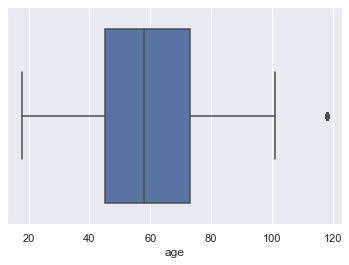

In [87]:
#Box plot of Age of Starbucks customers
sns.boxplot(data=profile, x='age')

Median Age : 58 years

In [88]:
k=profile[(profile['age'] > 100)]
# print(k.head(5))
k['age'].value_counts()

118    2175
101       5
Name: age, dtype: int64

**There are 2180 columns with age 118 and another thing we can notice is gender value is NaN and also income is NaN for these observations. We choose to drop these columns

In [89]:
profile.drop(profile.index[ (profile['age'] >101)], inplace = True)

In [90]:
print(profile.describe())
profile.shape


                age  became_member_on         income
count  14825.000000      1.482500e+04   14825.000000
mean      54.393524      2.016689e+07   65404.991568
std       17.383705      1.188565e+04   21598.299410
min       18.000000      2.013073e+07   30000.000000
25%       42.000000      2.016052e+07   49000.000000
50%       55.000000      2.017080e+07   64000.000000
75%       66.000000      2.017123e+07   80000.000000
max      101.000000      2.018073e+07  120000.000000


(14825, 5)

After removal of missing data (MCAR), the new men of age comes out to be 54 years and that of income is 65.4k (unchanged). 

In [91]:
(profile.isnull().sum())

gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

<AxesSubplot:xlabel='income'>

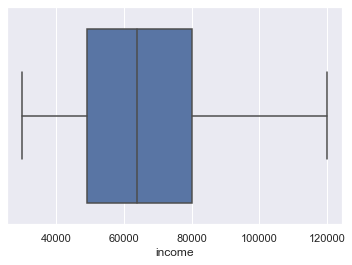

In [92]:
#Income distribution
sns.boxplot(data=profile, x='income')

In [93]:
#correct time format
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'].astype(str), format='%Y%m%d')


In [94]:
profile['became_member_on'].head()

1    2017-07-15
3    2017-05-09
5    2018-04-26
8    2018-02-09
12   2017-11-11
Name: became_member_on, dtype: datetime64[ns]

# Editing Attributes

In [95]:
profile['year'] = profile['became_member_on'].dt.year
profile['month'] = profile['became_member_on'].dt.month
profile['day']=profile['became_member_on'].dt.day_name()
profile['member_since_how_manydays'] = (pd.to_datetime('today') - profile['became_member_on']).astype('timedelta64[D]').astype(int)

In [96]:
profile.rename(columns={'id': 'customer_id'}, inplace=True)

In [97]:
profile.shape

(14825, 9)

In [98]:
profile.head().reset_index()

,index,gender,age,customer_id,became_member_on,income,year,month,day,member_since_how_manydays
0,1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,Saturday,1893
1,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5,Tuesday,1960
2,5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018,4,Thursday,1608
3,8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2018,2,Friday,1684
4,12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,2017,11,Saturday,1774


In [99]:
profile.age.min()

18

In [100]:
profile.age.max()

101

# Age Binning

In [101]:
profile['age_group'] = pd.cut(x=profile['age'], bins=[18, 20, 40, 60, 80, 101],
                    labels=['Teenage(18-19)', 'young(20-39)', 'Middle-age(40-59)',
                            'Old(60-79)', 'Very-Old(80-100)'], include_lowest=True)
profile['age_group']

1        Middle-age(40-59)
3               Old(60-79)
5               Old(60-79)
8               Old(60-79)
12       Middle-age(40-59)
               ...        
16995    Middle-age(40-59)
16996           Old(60-79)
16997    Middle-age(40-59)
16998     Very-Old(80-100)
16999           Old(60-79)
Name: age_group, Length: 14825, dtype: category
Categories (5, object): ['Teenage(18-19)' < 'young(20-39)' < 'Middle-age(40-59)' < 'Old(60-79)' < 'Very-Old(80-100)']

# Distribution plot of gender

In [102]:
val = profile['gender'].value_counts().index
cnt = profile['gender'].value_counts().values

fig = go.Figure([go.Bar(x=val, y=cnt, marker_color='teal')])
fig.update_layout(title_text='Gender Distribution', title_x=0.5)
fig.show()

Text(0.5, 1.0, 'Age-Group of members at Starbucks')

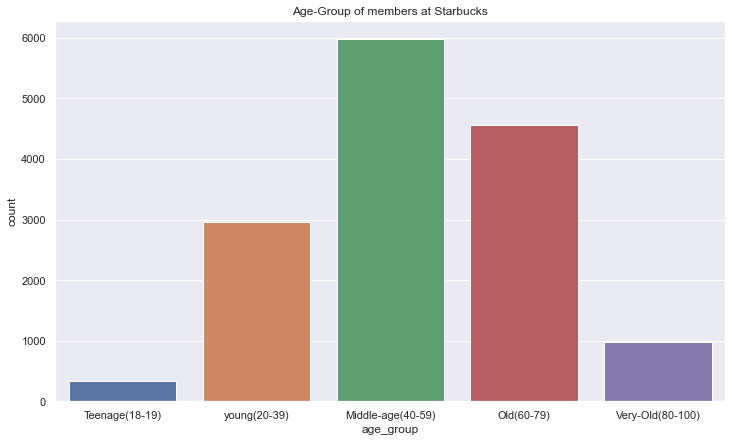

In [103]:
fig = plt.figure(figsize = (12,7))
sns.countplot(x='age_group',data=profile)
plt.xticks(rotation=0)
plt.title('Age-Group of members at Starbucks')

# Distribution plot of income

In [104]:
val = profile['income'].value_counts().index
cnt = profile['income'].value_counts().values

fig = go.Figure([go.Bar(x=val, y=cnt, marker_color='hotpink')])
fig.update_layout(title_text='Distribution of Income', title_x=0.5)
fig.show()

Text(0.5, 1.0, 'Members joined frequency in years')

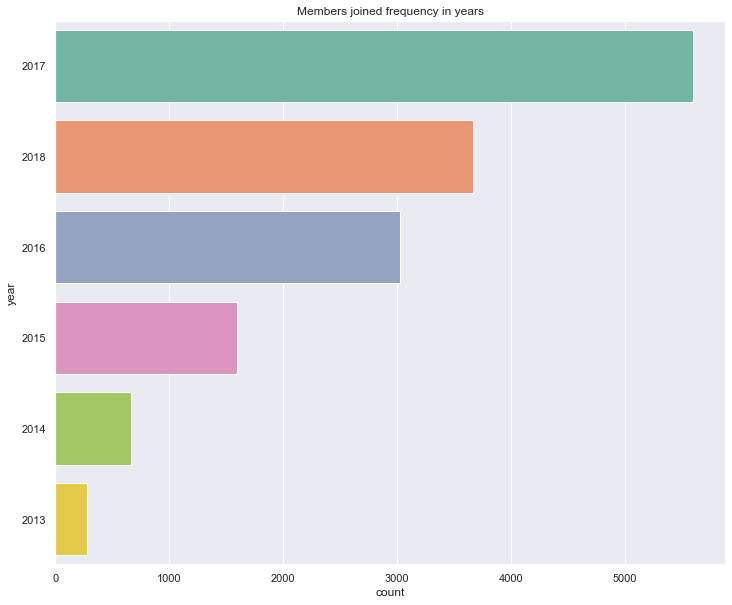

In [105]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="year", data=profile, palette="Set2", order=profile['year'].value_counts().index[0:15])
plt.title('Members joined frequency in years')

In [106]:
profile['gender'].value_counts(normalize=True)

M    0.572277
F    0.413423
O    0.014300
Name: gender, dtype: float64

In [107]:
profile['age_group'].value_counts(normalize=True)

Middle-age(40-59)    0.403440
Old(60-79)           0.307319
young(20-39)         0.199798
Very-Old(80-100)     0.066509
Teenage(18-19)       0.022934
Name: age_group, dtype: float64

# Profile data conclusions
1. People joined as member increased from 2015 and highest in 2017
2. Income distribution is not skewed much, and is in the range of 50k-73k
3. 57% of the staff are Male, 41.3% Female and 1.4% Others
4. Highest proportion of staff at around 40%  are in the age-group 40-59.
5. Members are 57.2% males, 41.3 % Females and 1.4% Others

# EDA: Portfolio data

In [108]:
pf.head()
pf.shape

(10, 6)

In [109]:
channels_df = pf.groupby(['id','channels'])
channels_df.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


Correlation:

In [110]:
pf.corr()


,reward,difficulty,duration
reward,1.000000,0.465686,0.160262
difficulty,0.465686,1.000000,0.808414
duration,0.160262,0.808414,1.000000


It is obvious that rewards which are more difficult to claim take more time (duration) to complete. This can be confirm as a result of high positive correation between difficulty and duration.

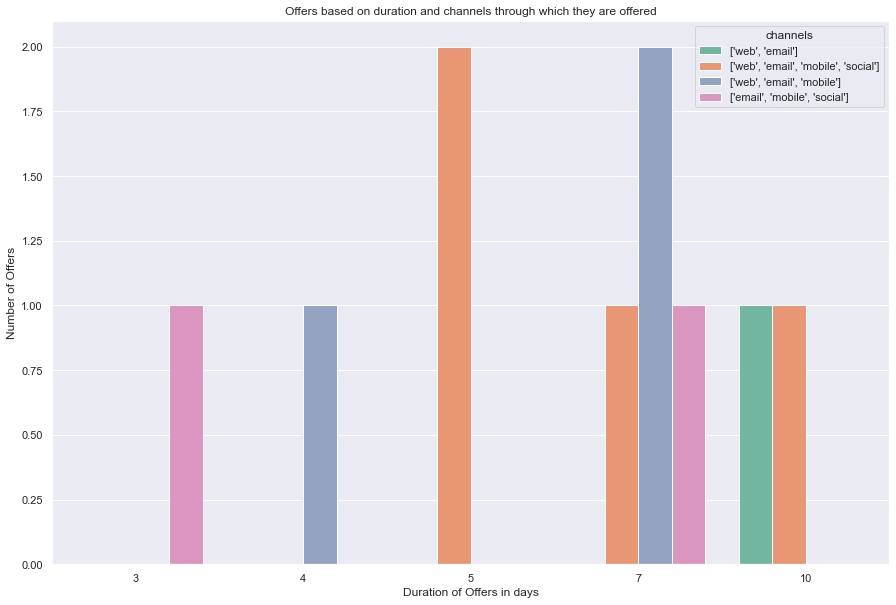

In [111]:
channels_df= channels_df.mean().reset_index()
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="duration", data=channels_df, palette="Set2", hue='channels')
plt.ylabel('Number of Offers')
plt.xlabel('Duration of Offers in days')
plt.title('Offers based on duration and channels through which they are offered')
plt.show()

# Number of offers based on difficulty and channels through which they are offered

Text(0.5, 1.0, 'Offers based on difficulty and channels through which they are offered')

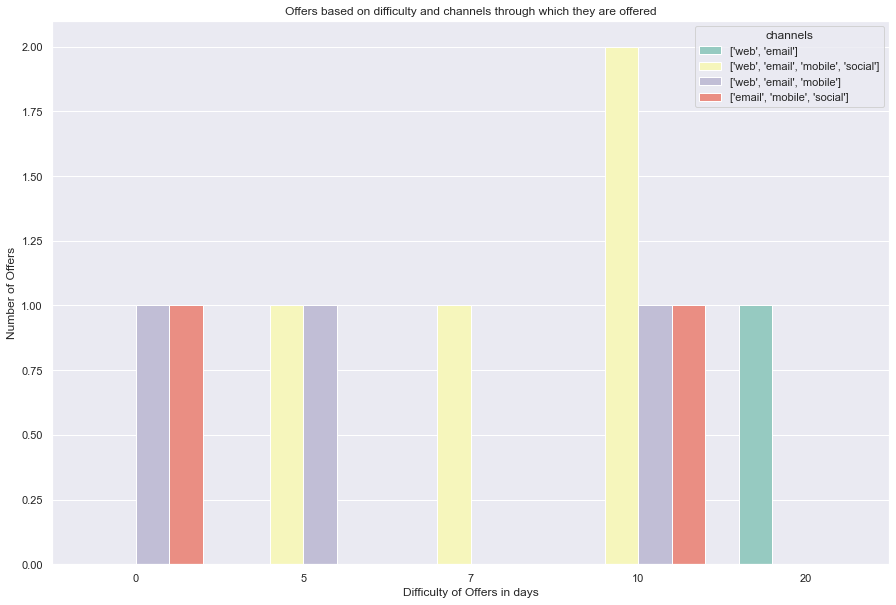

In [112]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="difficulty", data=channels_df, palette="Set3", hue='channels')
plt.ylabel('Number of Offers')
plt.xlabel('Difficulty of Offers in days')
plt.title('Offers based on difficulty and channels through which they are offered')

1. One offer is most diffuclt with level of 20 and it is offered only through web and email

# Types of Discounts on Offers

In [113]:
pie_df = pf.offer_type.value_counts().reset_index().offer_type

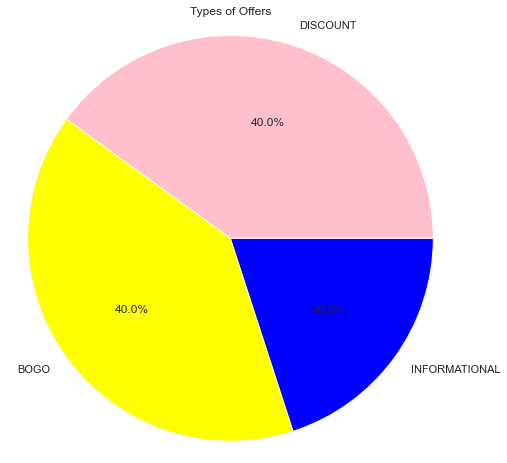

In [114]:
plt.figure(figsize=(8,8))
labels = 'DISCOUNT','BOGO','INFORMATIONAL'
colors = ['pink','yellow','blue']
explode = (0, 0.1, 0)
plt.pie(pie_df, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Types of Offers')
plt.axis('equal')
plt.show()

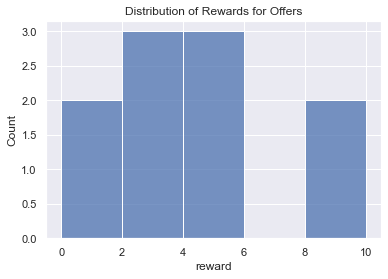

In [115]:

sns.histplot(pf, x="reward")
plt.title('Distribution of Rewards for Offers')
plt.show()


<AxesSubplot:xlabel='difficulty'>

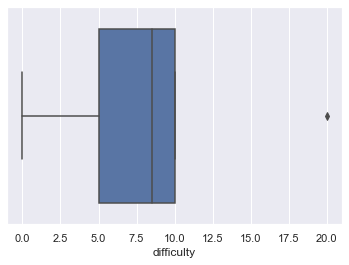

In [116]:
sns.boxplot(data=pf,x='difficulty')

There are some tasks with extreme difficulty of 20

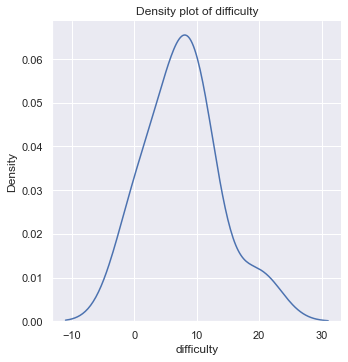

In [117]:
sns.displot(pf, x="difficulty", kind="kde")
plt.title('Density plot of difficulty')
plt.show()

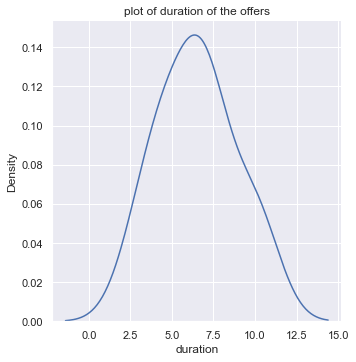

In [118]:

sns.set_theme(style="darkgrid")
sns.displot(pf, x="duration", kind="kde")
plt.title('plot of duration of the offers')
plt.show()

In [119]:
pf.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


# EDA:  Transcript Data

In [120]:
df = ts.copy()
ts.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


# No missing values in Transcript data

In [121]:
df.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [122]:
df.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [123]:
offer_status = df.event.value_counts().reset_index()

In [124]:
offer_status.columns=['Event', 'Number of offers in that event']
offer_status

,Event,Number of offers in that event
0,transaction,138953
1,offer received,76277
2,offer viewed,57725
3,offer completed,33579


In [125]:
# PErcentages of Ofeer distribution
df.event.value_counts(normalize=True)

transaction        0.453304
offer received     0.248837
offer viewed       0.188315
offer completed    0.109544
Name: event, dtype: float64

In [126]:
val = offer_status['Event']
cnt = offer_status['Number of offers in that event']

fig = go.Figure([go.Bar(x=val, y=cnt, marker_color='darkturquoise')])
fig.update_layout(title_text='Number of offers versus their status', title_x=0.4)
fig.show()

While 45% of the offers are still in transaction, only 11% offers are completed by the customers

# Binning time intervals

In [127]:
df.time.unique()

array([  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72,
        78,  84,  90,  96, 102, 108, 114, 120, 126, 132, 138, 144, 150,
       156, 162, 168, 174, 180, 186, 192, 198, 204, 210, 216, 222, 228,
       234, 240, 246, 252, 258, 264, 270, 276, 282, 288, 294, 300, 306,
       312, 318, 324, 330, 336, 342, 348, 354, 360, 366, 372, 378, 384,
       390, 396, 402, 408, 414, 420, 426, 432, 438, 444, 450, 456, 462,
       468, 474, 480, 486, 492, 498, 504, 510, 516, 522, 528, 534, 540,
       546, 552, 558, 564, 570, 576, 582, 588, 594, 600, 606, 612, 618,
       624, 630, 636, 642, 648, 654, 660, 666, 672, 678, 684, 690, 696,
       702, 708, 714], dtype=int64)

In [128]:
df['time_group'] = pd.cut(x=df['time'], bins=[0, 100, 200, 300, 400, 500,600,700,800], include_lowest=True,
                    labels=['0-100 days', '100-200 days', '200-300 days', '300-400 days', '400-500 days', '500-600 days', '600-700 days', '700-800 days'])

Text(0.5, 1.0, 'No. of offers in the Timespan')

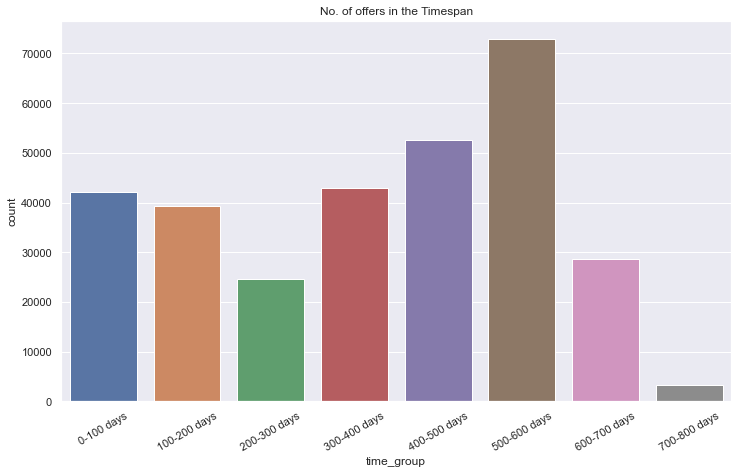

In [129]:
fig = plt.figure(figsize = (12,7))
sns.countplot(x='time_group',data=df)
plt.xticks(rotation=30)
plt.title('No. of offers in the Timespan')

In [130]:
df.person.value_counts() 

94de646f7b6041228ca7dec82adb97d2    51
8dbfa485249f409aa223a2130f40634a    49
79d9d4f86aca4bed9290350fb43817c2    48
5e60c6aa3b834e44b822ea43a3efea26    48
d0a80415b84c4df4908b8403b19765e3    48
                                    ..
3045af4e98794a04a5542d3eac939b1f     2
7ecfc592171f4844bdc05bdbb48d3847     2
df9fc9a86ca84ef5aedde8925d5838ba     2
1bfe13d2453c4185a6486c6817e0d568     2
da7a7c0dcfcb41a8acc7864a53cf60fb     1
Name: person, Length: 17000, dtype: int64

In [131]:
offers_received_df = df[df.event == 'offer received']
len(offers_received_df)

76277

A total of 76277 offers have been received by the customers

*All persons who have received offer may not accept*

In [132]:
offers_viewed_df = df[df.event == 'offer viewed']
len(offers_viewed_df)

57725

In [133]:
offers_completed_df = df[df.event == 'offer completed']
len(offers_completed_df)

33579

In [134]:
offer_completed_percentage=len(offers_completed_df)/len(offers_received_df)*100
offer_viewed_percentage=len(offers_viewed_df)/len(offers_received_df)*100
print("offer_viewed_percentage :", offer_viewed_percentage)
print("offer_completed_percentage :", offer_completed_percentage)

offer_viewed_percentage : 75.67812053436815
offer_completed_percentage : 44.02244451145168


Out of 76227 offers received by all customers in total , only 57725 (75.67%) were viewed and only  33575 (44.02%) were completed